<a href="https://colab.research.google.com/github/roshansadath/COMP6721_Winter2023_GroupN/blob/main/NIH%20Chest%20XRay/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:

import os, time, random, torch, warnings
import numpy as np
from PIL import Image
import torch.nn as nn
from tqdm import tqdm
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.filterwarnings("ignore", category=UserWarning)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# data_path = "/content/drive/MyDrive/Harvard_Chest_XRay/"
data_path = "/content/drive/MyDrive/NIH_Chest_XRay/"
#data_path = "drive/My Drive/Harvard_Chest_XRay/"

sample_ratio = 1
batch_size = 96
num_epochs = 40

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

**DATA PREPROCESSING**

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/utils.ipynb"
dataset, train_loader, train_indices, test_loader, test_indices, val_loader, val_indices = data_preprocess(data_path, sample_ratio, batch_size)

**MODEL TRAINING**

In [ ]:
def save_metrics(loss, accuracy, model):
  np.save("{}{}_train_loss.npy".format(data_path, model), loss)
  np.save("{}{}_train_accuracy.npy".format(data_path, model), accuracy)

In [ ]:
# Define the AlexNet model and set Pretraining to False to train model from scratch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
model.classifier[6] = nn.Linear(4096, len(dataset.classes))
model.to(device)

# Define loss function as CrossEntropy and optimizer as Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
losses, accuracies, v_accuracies, v_losses = train_model(model, criterion, optimizer, "AlexNet", num_epochs)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to C:\Users\Saketh/.cache\torch\hub\v0.10.0.zip
Epoch 1/40: 100%|██████████████████████████████████████████████████████| 167/167 [03:34<00:00,  1.29s/batch, loss=2.57]


Epoch: 1 | Accuracy: 0.1133 | Loss: 2.5848 | Recall: 0.0941 | Precision: 0.0772 | F-Score: 0.0786 | Time: 215.0966s
VALIDATION: Accuracy: 0.1461 | Loss: 2.5408 | Recall: 0.1221 | Precision: 0.0719 | F-score: 0.0743



Epoch 2/40: 100%|██████████████████████████████████████████████████████| 167/167 [02:22<00:00,  1.17batch/s, loss=2.53]


Epoch: 2 | Accuracy: 0.1540 | Loss: 2.4976 | Recall: 0.1112 | Precision: 0.0886 | F-Score: 0.0902 | Time: 143.0749s
VALIDATION: Accuracy: 0.1632 | Loss: 2.4899 | Recall: 0.1403 | Precision: 0.1097 | F-score: 0.1054



Epoch 3/40: 100%|███████████████████████████████████████████████████████| 167/167 [02:28<00:00,  1.13batch/s, loss=2.3]


Epoch: 3 | Accuracy: 0.1657 | Loss: 2.4636 | Recall: 0.1203 | Precision: 0.1014 | F-Score: 0.0991 | Time: 148.3204s
VALIDATION: Accuracy: 0.1667 | Loss: 2.4566 | Recall: 0.1406 | Precision: 0.1221 | F-score: 0.1100



Epoch 4/40: 100%|██████████████████████████████████████████████████████| 167/167 [02:17<00:00,  1.22batch/s, loss=2.39]


Epoch: 4 | Accuracy: 0.1774 | Loss: 2.4395 | Recall: 0.1275 | Precision: 0.1081 | F-Score: 0.1055 | Time: 137.6156s
VALIDATION: Accuracy: 0.1807 | Loss: 2.4333 | Recall: 0.1528 | Precision: 0.1223 | F-score: 0.1130



Epoch 5/40: 100%|██████████████████████████████████████████████████████| 167/167 [02:12<00:00,  1.26batch/s, loss=2.49]


Epoch: 5 | Accuracy: 0.1915 | Loss: 2.4165 | Recall: 0.1341 | Precision: 0.1138 | F-Score: 0.1120 | Time: 132.8408s
VALIDATION: Accuracy: 0.1973 | Loss: 2.4099 | Recall: 0.1689 | Precision: 0.1500 | F-score: 0.1305



Epoch 6/40: 100%|███████████████████████████████████████████████████████| 167/167 [02:11<00:00,  1.27batch/s, loss=2.3]


Epoch: 6 | Accuracy: 0.2068 | Loss: 2.3739 | Recall: 0.1408 | Precision: 0.1339 | F-Score: 0.1187 | Time: 131.6530s
VALIDATION: Accuracy: 0.2052 | Loss: 2.3919 | Recall: 0.1747 | Precision: 0.1563 | F-score: 0.1492



Epoch 7/40: 100%|██████████████████████████████████████████████████████| 167/167 [02:24<00:00,  1.16batch/s, loss=2.28]


Epoch: 7 | Accuracy: 0.2211 | Loss: 2.3379 | Recall: 0.1473 | Precision: 0.1387 | F-Score: 0.1254 | Time: 144.8444s
VALIDATION: Accuracy: 0.2113 | Loss: 2.3781 | Recall: 0.1795 | Precision: 0.1723 | F-score: 0.1577



Epoch 8/40: 100%|███████████████████████████████████████████████████████| 167/167 [02:16<00:00,  1.22batch/s, loss=2.3]


Epoch: 8 | Accuracy: 0.2355 | Loss: 2.2951 | Recall: 0.1537 | Precision: 0.1458 | F-Score: 0.1319 | Time: 136.9921s
VALIDATION: Accuracy: 0.2157 | Loss: 2.3561 | Recall: 0.1814 | Precision: 0.1747 | F-score: 0.1502



Epoch 9/40: 100%|██████████████████████████████████████████████████████| 167/167 [02:16<00:00,  1.22batch/s, loss=2.31]


Epoch: 9 | Accuracy: 0.2522 | Loss: 2.2576 | Recall: 0.1602 | Precision: 0.1554 | F-Score: 0.1382 | Time: 136.9320s
VALIDATION: Accuracy: 0.2196 | Loss: 2.3257 | Recall: 0.1838 | Precision: 0.2396 | F-score: 0.1618



Epoch 10/40: 100%|█████████████████████████████████████████████████████| 167/167 [02:08<00:00,  1.30batch/s, loss=2.04]


Epoch: 10 | Accuracy: 0.2628 | Loss: 2.2135 | Recall: 0.1663 | Precision: 0.1585 | F-Score: 0.1445 | Time: 129.2723s
VALIDATION: Accuracy: 0.2375 | Loss: 2.3090 | Recall: 0.2015 | Precision: 0.1789 | F-score: 0.1752



Epoch 11/40: 100%|█████████████████████████████████████████████████████| 167/167 [02:08<00:00,  1.30batch/s, loss=2.04]


Epoch: 11 | Accuracy: 0.2830 | Loss: 2.1628 | Recall: 0.1730 | Precision: 0.1664 | F-Score: 0.1514 | Time: 129.2144s
VALIDATION: Accuracy: 0.2419 | Loss: 2.2874 | Recall: 0.2022 | Precision: 0.1893 | F-score: 0.1870



Epoch 12/40: 100%|█████████████████████████████████████████████████████| 167/167 [02:09<00:00,  1.29batch/s, loss=1.84]


Epoch: 12 | Accuracy: 0.2997 | Loss: 2.1187 | Recall: 0.1797 | Precision: 0.1948 | F-Score: 0.1585 | Time: 129.8627s
VALIDATION: Accuracy: 0.2542 | Loss: 2.2836 | Recall: 0.2127 | Precision: 0.1921 | F-score: 0.1801



Epoch 13/40: 100%|█████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=1.94]


Epoch: 13 | Accuracy: 0.3169 | Loss: 2.0572 | Recall: 0.1867 | Precision: 0.2222 | F-Score: 0.1660 | Time: 131.0331s
VALIDATION: Accuracy: 0.2485 | Loss: 2.2767 | Recall: 0.2090 | Precision: 0.2004 | F-score: 0.1903



Epoch 14/40: 100%|█████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=2.07]


Epoch: 14 | Accuracy: 0.3425 | Loss: 1.9849 | Recall: 0.1943 | Precision: 0.2258 | F-Score: 0.1744 | Time: 131.0615s
VALIDATION: Accuracy: 0.2585 | Loss: 2.2603 | Recall: 0.2189 | Precision: 0.2120 | F-score: 0.2020



Epoch 15/40: 100%|█████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.27batch/s, loss=2.03]


Epoch: 15 | Accuracy: 0.3682 | Loss: 1.8978 | Recall: 0.2026 | Precision: 0.2399 | F-Score: 0.1837 | Time: 131.7231s
VALIDATION: Accuracy: 0.2629 | Loss: 2.2930 | Recall: 0.2289 | Precision: 0.2141 | F-score: 0.2083



Epoch 16/40: 100%|█████████████████████████████████████████████████████| 167/167 [02:11<00:00,  1.27batch/s, loss=1.93]


Epoch: 16 | Accuracy: 0.4076 | Loss: 1.7927 | Recall: 0.2124 | Precision: 0.2579 | F-Score: 0.1952 | Time: 132.1933s
VALIDATION: Accuracy: 0.2563 | Loss: 2.3696 | Recall: 0.2187 | Precision: 0.2159 | F-score: 0.2056



Epoch 17/40: 100%|█████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=1.96]


Epoch: 17 | Accuracy: 0.4557 | Loss: 1.6486 | Recall: 0.2237 | Precision: 0.2741 | F-Score: 0.2085 | Time: 131.5492s
VALIDATION: Accuracy: 0.2638 | Loss: 2.4530 | Recall: 0.2235 | Precision: 0.2192 | F-score: 0.2128



Epoch 18/40: 100%|█████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=1.54]


Epoch: 18 | Accuracy: 0.5139 | Loss: 1.4915 | Recall: 0.2375 | Precision: 0.2957 | F-Score: 0.2250 | Time: 131.0905s
VALIDATION: Accuracy: 0.2498 | Loss: 2.6312 | Recall: 0.2126 | Precision: 0.2191 | F-score: 0.2059



Epoch 19/40: 100%|██████████████████████████████████████████████████████| 167/167 [02:11<00:00,  1.27batch/s, loss=1.5]


Epoch: 19 | Accuracy: 0.5780 | Loss: 1.2959 | Recall: 0.2536 | Precision: 0.3216 | F-Score: 0.2446 | Time: 132.9329s
VALIDATION: Accuracy: 0.2655 | Loss: 2.6560 | Recall: 0.2384 | Precision: 0.2439 | F-score: 0.2384



Epoch 20/40: 100%|█████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=1.05]


Epoch: 20 | Accuracy: 0.6471 | Loss: 1.0836 | Recall: 0.2718 | Precision: 0.3452 | F-Score: 0.2662 | Time: 131.6093s
VALIDATION: Accuracy: 0.2542 | Loss: 2.9188 | Recall: 0.2161 | Precision: 0.2092 | F-score: 0.2095



Epoch 21/40: 100%|█████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=1.07]


Epoch: 21 | Accuracy: 0.7192 | Loss: 0.8749 | Recall: 0.2920 | Precision: 0.3725 | F-Score: 0.2902 | Time: 131.7958s
VALIDATION: Accuracy: 0.2568 | Loss: 3.2744 | Recall: 0.2190 | Precision: 0.2192 | F-score: 0.2162



Epoch 22/40: 100%|████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=0.867]


Epoch: 22 | Accuracy: 0.7814 | Loss: 0.6857 | Recall: 0.3134 | Precision: 0.3997 | F-Score: 0.3152 | Time: 131.6440s
VALIDATION: Accuracy: 0.2419 | Loss: 3.8602 | Recall: 0.2126 | Precision: 0.2289 | F-score: 0.2127



Epoch 23/40: 100%|████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=0.417]


Epoch: 23 | Accuracy: 0.8417 | Loss: 0.5086 | Recall: 0.3360 | Precision: 0.4266 | F-Score: 0.3414 | Time: 131.6548s
VALIDATION: Accuracy: 0.2537 | Loss: 4.1114 | Recall: 0.2253 | Precision: 0.2282 | F-score: 0.2204



Epoch 24/40: 100%|████████████████████████████████████████████████████| 167/167 [02:13<00:00,  1.25batch/s, loss=0.495]


Epoch: 24 | Accuracy: 0.8773 | Loss: 0.3956 | Recall: 0.3583 | Precision: 0.4517 | F-Score: 0.3667 | Time: 134.3213s
VALIDATION: Accuracy: 0.2463 | Loss: 4.4281 | Recall: 0.2083 | Precision: 0.2022 | F-score: 0.2020



Epoch 25/40: 100%|████████████████████████████████████████████████████| 167/167 [02:11<00:00,  1.27batch/s, loss=0.469]


Epoch: 25 | Accuracy: 0.9040 | Loss: 0.3112 | Recall: 0.3800 | Precision: 0.4749 | F-Score: 0.3910 | Time: 132.3234s
VALIDATION: Accuracy: 0.2437 | Loss: 4.7487 | Recall: 0.2083 | Precision: 0.2038 | F-score: 0.2042



Epoch 26/40: 100%|████████████████████████████████████████████████████| 167/167 [02:11<00:00,  1.27batch/s, loss=0.342]


Epoch: 26 | Accuracy: 0.9270 | Loss: 0.2412 | Recall: 0.4009 | Precision: 0.4966 | F-Score: 0.4142 | Time: 132.3570s
VALIDATION: Accuracy: 0.2419 | Loss: 4.9210 | Recall: 0.2134 | Precision: 0.2088 | F-score: 0.2079



Epoch 27/40: 100%|████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=0.153]


Epoch: 27 | Accuracy: 0.9414 | Loss: 0.1902 | Recall: 0.4209 | Precision: 0.5164 | F-Score: 0.4360 | Time: 132.1772s
VALIDATION: Accuracy: 0.2292 | Loss: 5.6550 | Recall: 0.1962 | Precision: 0.2016 | F-score: 0.1962



Epoch 28/40: 100%|████████████████████████████████████████████████████| 167/167 [02:09<00:00,  1.29batch/s, loss=0.231]


Epoch: 28 | Accuracy: 0.9530 | Loss: 0.1520 | Recall: 0.4399 | Precision: 0.5350 | F-Score: 0.4565 | Time: 131.2886s
VALIDATION: Accuracy: 0.2454 | Loss: 6.0311 | Recall: 0.2102 | Precision: 0.2056 | F-score: 0.2060



Epoch 29/40: 100%|███████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=0.0418]


Epoch: 29 | Accuracy: 0.9610 | Loss: 0.1340 | Recall: 0.4578 | Precision: 0.5519 | F-Score: 0.4756 | Time: 131.9381s
VALIDATION: Accuracy: 0.2533 | Loss: 6.2412 | Recall: 0.2175 | Precision: 0.2103 | F-score: 0.2091



Epoch 30/40: 100%|████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=0.109]


Epoch: 30 | Accuracy: 0.9694 | Loss: 0.1040 | Recall: 0.4749 | Precision: 0.5679 | F-Score: 0.4938 | Time: 131.8164s
VALIDATION: Accuracy: 0.2572 | Loss: 6.4510 | Recall: 0.2202 | Precision: 0.2208 | F-score: 0.2185



Epoch 31/40: 100%|████████████████████████████████████████████████████| 167/167 [02:11<00:00,  1.27batch/s, loss=0.187]


Epoch: 31 | Accuracy: 0.9737 | Loss: 0.0938 | Recall: 0.4910 | Precision: 0.5826 | F-Score: 0.5107 | Time: 132.8250s
VALIDATION: Accuracy: 0.2406 | Loss: 6.5684 | Recall: 0.2120 | Precision: 0.2175 | F-score: 0.2117



Epoch 32/40: 100%|████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=0.037]


Epoch: 32 | Accuracy: 0.9736 | Loss: 0.0914 | Recall: 0.5061 | Precision: 0.5962 | F-Score: 0.5264 | Time: 132.3239s
VALIDATION: Accuracy: 0.2585 | Loss: 6.6124 | Recall: 0.2216 | Precision: 0.2169 | F-score: 0.2159



Epoch 33/40: 100%|███████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=0.0278]


Epoch: 33 | Accuracy: 0.9774 | Loss: 0.0752 | Recall: 0.5204 | Precision: 0.6088 | F-Score: 0.5412 | Time: 132.2600s
VALIDATION: Accuracy: 0.2550 | Loss: 6.8717 | Recall: 0.2169 | Precision: 0.2191 | F-score: 0.2166



Epoch 34/40: 100%|████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=0.264]


Epoch: 34 | Accuracy: 0.9747 | Loss: 0.0780 | Recall: 0.5338 | Precision: 0.6205 | F-Score: 0.5549 | Time: 131.8844s
VALIDATION: Accuracy: 0.2402 | Loss: 6.9403 | Recall: 0.2049 | Precision: 0.2032 | F-score: 0.2014



Epoch 35/40: 100%|███████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=0.0592]


Epoch: 35 | Accuracy: 0.9726 | Loss: 0.0927 | Recall: 0.5463 | Precision: 0.6312 | F-Score: 0.5677 | Time: 131.7873s
VALIDATION: Accuracy: 0.2415 | Loss: 6.2875 | Recall: 0.2065 | Precision: 0.2076 | F-score: 0.2061



Epoch 36/40: 100%|███████████████████████████████████████████████████| 167/167 [02:13<00:00,  1.25batch/s, loss=0.0306]


Epoch: 36 | Accuracy: 0.9821 | Loss: 0.0587 | Recall: 0.5584 | Precision: 0.6416 | F-Score: 0.5800 | Time: 135.1289s
VALIDATION: Accuracy: 0.2397 | Loss: 7.0305 | Recall: 0.2038 | Precision: 0.2009 | F-score: 0.2004



Epoch 37/40: 100%|███████████████████████████████████████████████████| 167/167 [02:18<00:00,  1.21batch/s, loss=0.0693]


Epoch: 37 | Accuracy: 0.9824 | Loss: 0.0587 | Recall: 0.5699 | Precision: 0.6514 | F-Score: 0.5916 | Time: 140.1983s
VALIDATION: Accuracy: 0.2283 | Loss: 7.3677 | Recall: 0.1979 | Precision: 0.2022 | F-score: 0.1978



Epoch 38/40: 100%|███████████████████████████████████████████████████| 167/167 [02:14<00:00,  1.24batch/s, loss=0.0414]


Epoch: 38 | Accuracy: 0.9793 | Loss: 0.0709 | Recall: 0.5806 | Precision: 0.6604 | F-Score: 0.6024 | Time: 136.6649s
VALIDATION: Accuracy: 0.2327 | Loss: 7.1491 | Recall: 0.2000 | Precision: 0.1939 | F-score: 0.1924



Epoch 39/40: 100%|███████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=0.0324]


Epoch: 39 | Accuracy: 0.9828 | Loss: 0.0612 | Recall: 0.5910 | Precision: 0.6690 | F-Score: 0.6128 | Time: 132.0813s
VALIDATION: Accuracy: 0.2367 | Loss: 7.1727 | Recall: 0.2127 | Precision: 0.2114 | F-score: 0.2091



Epoch 40/40: 100%|████████████████████████████████████████████████████| 167/167 [02:10<00:00,  1.28batch/s, loss=0.102]


Epoch: 40 | Accuracy: 0.9826 | Loss: 0.0579 | Recall: 0.6008 | Precision: 0.6772 | F-Score: 0.6226 | Time: 132.2410s
VALIDATION: Accuracy: 0.2454 | Loss: 7.3491 | Recall: 0.2157 | Precision: 0.2146 | F-score: 0.2140



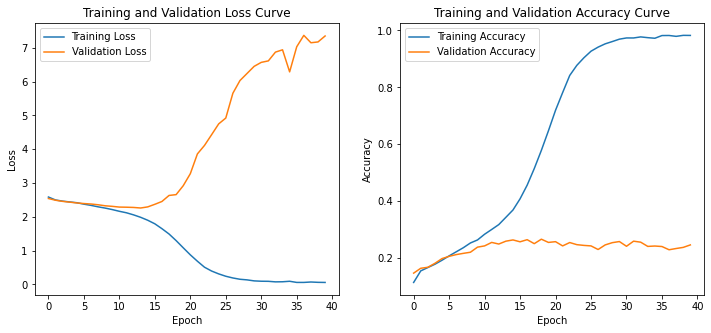

In [ ]:
#Plotting the Loss and Accuracy Curves
plot_model_curves(losses, accuracies, v_accuracies, v_losses)

TEST: Accuracy: 0.2397 | Loss: 7.5381 | Recall: 0.2164 | Precision: 0.2206 | F-score: 0.2165



<Figure size 576x576 with 0 Axes>

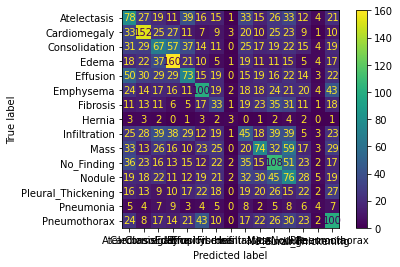

In [ ]:
#Evaluate Model on Test Set
evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, "AlexNet")

In [ ]:
torch.save(model.state_dict(), "{}alexnet.pth".format(data_path))

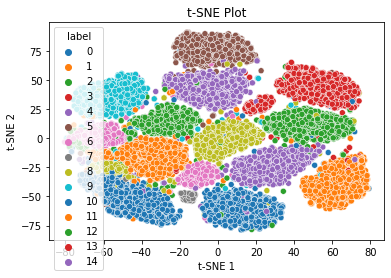

In [ ]:
#Obtain TSNE Plot
plot_TSNE(train_loader, device, model)

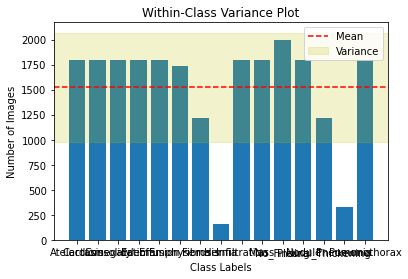

In [ ]:
# Get the class labels and the number of classes
plot_within_class_variance(dataset)